In [43]:
import numpy as np
import re
import operator
import sys
from os import listdir
from os.path import join,isdir,isfile
from matplotlib import pyplot as plt
from unicodedata import normalize
minTerm = 0
maxTerm = 0
vacias_path = " "
token = 0

In [44]:
def tokenizar(line):
	token=["»","<",">",".","·",",",":",";","!","¡","¿","?","#","$","%","&","/","(",")","[","]","{","}","+","-","*","_","|","°","=","'",'"']
	lista = []
	#print("linea del archivo:"+line)
	line = line.lower()
	for t in token:
		line=line.replace(t,' ')	
	line = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", line), 0, re.I)
	line = normalize( 'NFC', line)
	line = line.split()
	for word in line :
		if ( ( minTerm  == 0 ) and (  maxTerm == 0 ) ) :
			lista.append(word)
		else:
			if (len(word)>=minTerm)and(len(word)<=maxTerm) :
				lista.append(word)
	return lista


In [45]:
def generar_docs(dirname):
	docs = []
	files = listdir(dirname)
	for file in files:
		doc = []
		new = False
		if not isdir(dirname+'/'+file):
			with open(dirname+'/'+file,'r', encoding='utf-8', errors='ignore') as f:
				foundw = False				
				for line in f.readlines():					
					if new:
						doc = []
						new = False
					if line.strip() == '.W':
						foundw = True
					else:
						if foundw:
							if not line.strip() == '.X':
								line = tokenizar(line)
								for word in line:
									doc.append(word)
							else:
								foundw = False
								new = True
								docs.append(doc)																							
	return docs	

In [46]:
def parser_heaps_law(dirname):
    docs = generar_docs(dirname)
    total_terms = []
    total_uniq_terms = []
    founds = []
    for doc in docs:
        for token in doc:
            if len(total_terms) == 0:
                total_terms.append(1)
                total_uniq_terms.append(1)
                founds.append(token)
            else:
                total_terms.append(total_terms[len(total_terms)-1]+1)
                if not token in founds:
                    total_uniq_terms.append(total_uniq_terms[len(total_uniq_terms)-1]+1)
                    founds.append(token)
                else:
                    total_uniq_terms.append(total_uniq_terms[len(total_uniq_terms)-1])    
    return total_terms, total_uniq_terms

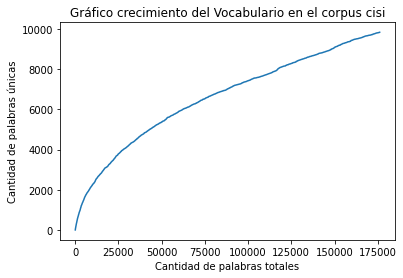

In [47]:
x, y = parser_heaps_law('C:/Users/user/Documents/Desarrollo/RI/cisi')
plt.title("Gráfico crecimiento del Vocabulario en el corpus cisi") 
plt.xlabel("Cantidad de palabras totales") 
plt.ylabel("Cantidad de palabras únicas") 
plt.plot(x,y) 
plt.show()

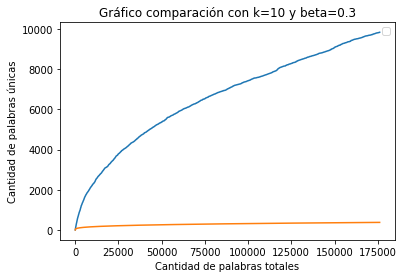

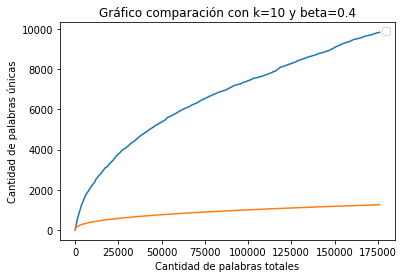

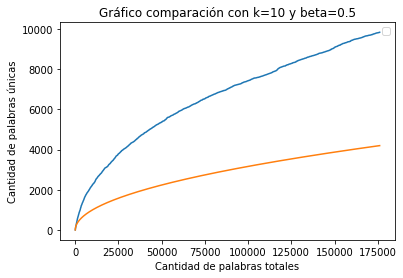

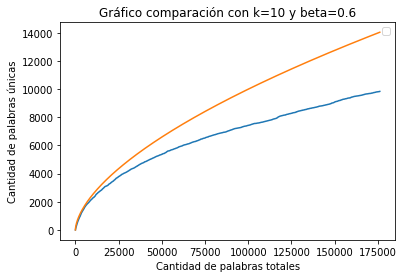

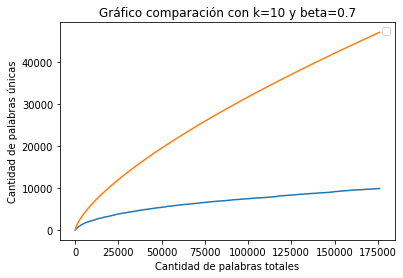

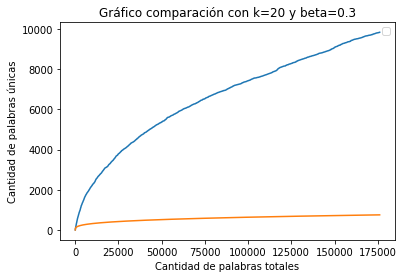

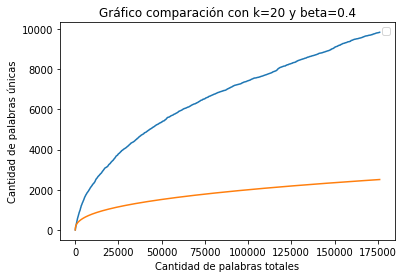

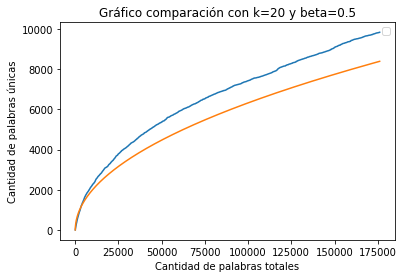

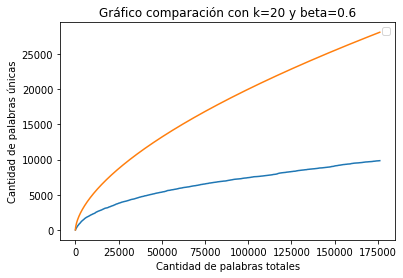

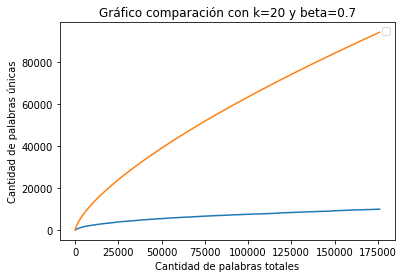

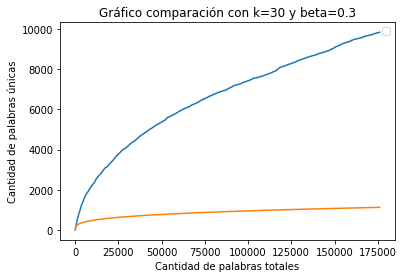

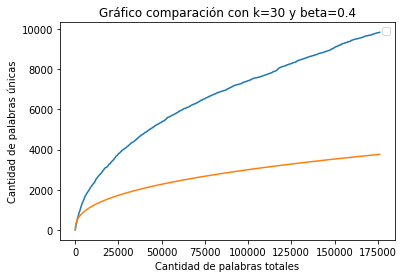

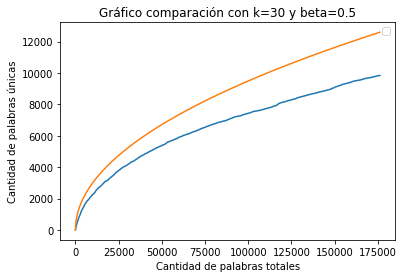

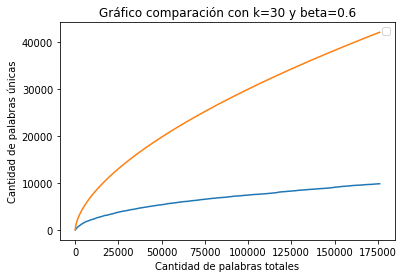

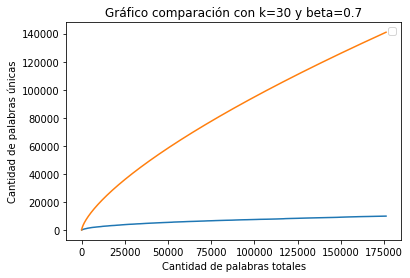

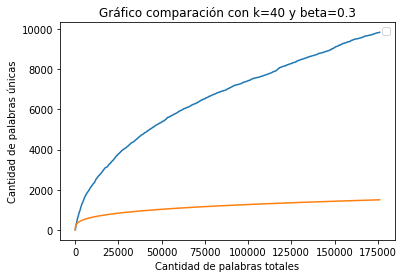

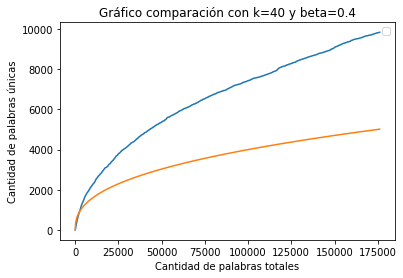

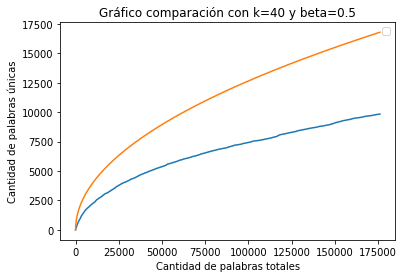

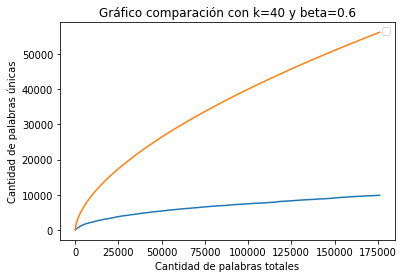

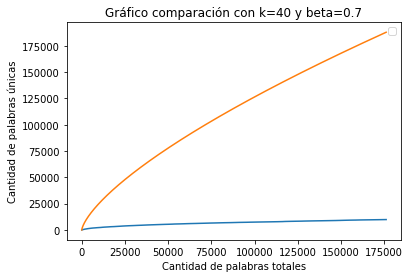

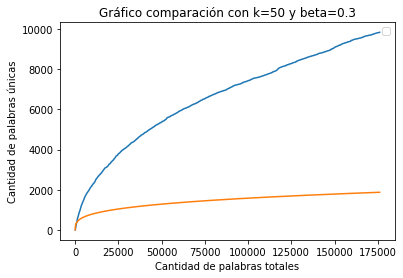

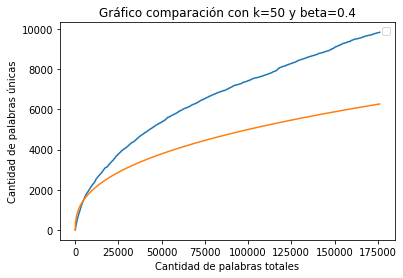

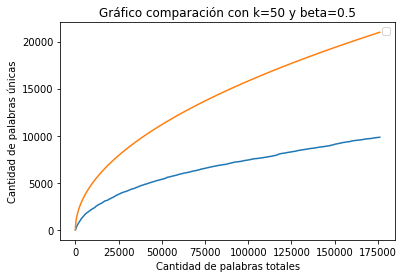

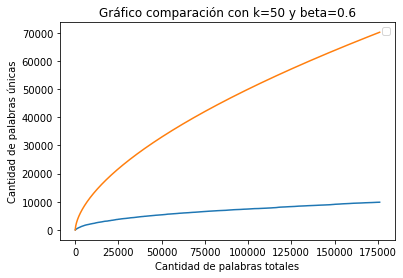

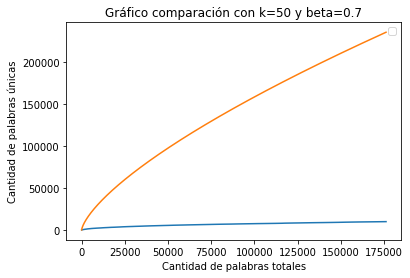

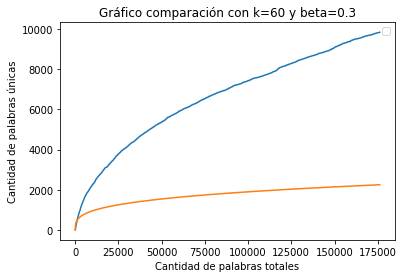

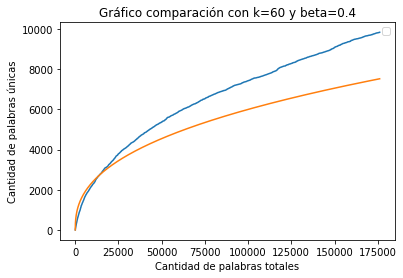

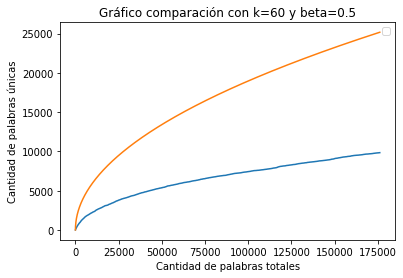

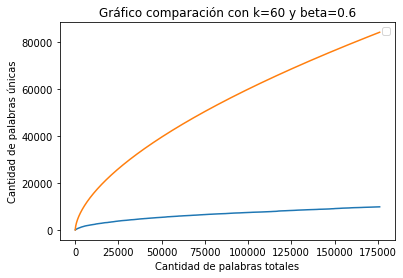

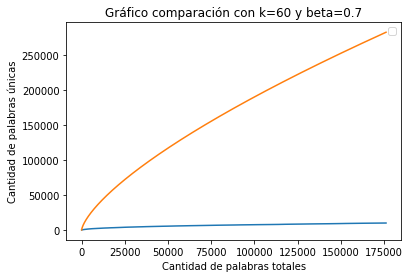

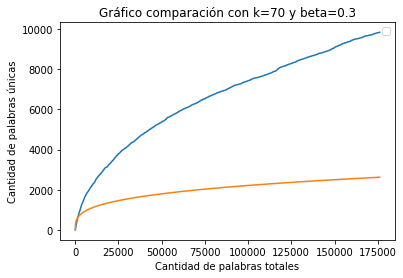

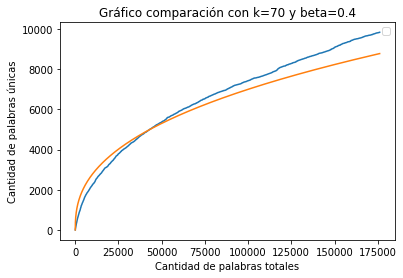

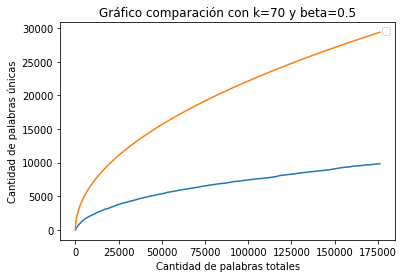

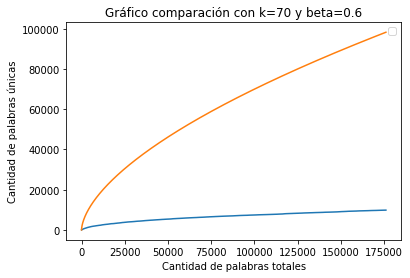

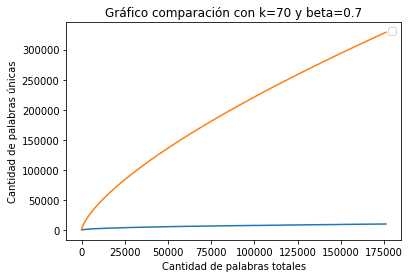

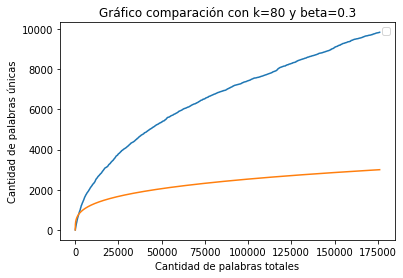

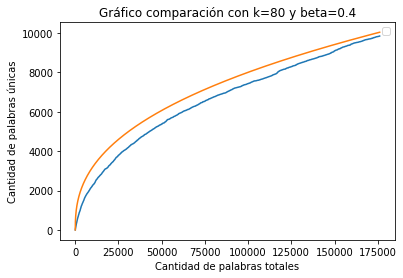

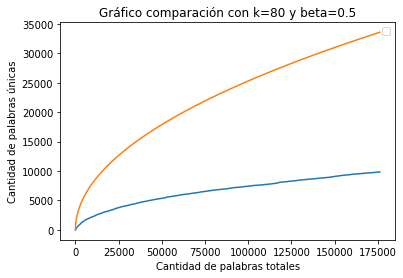

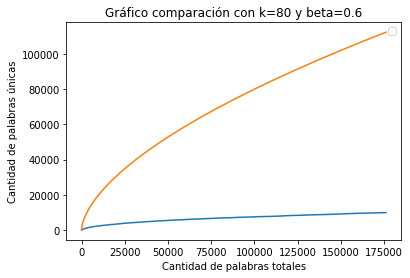

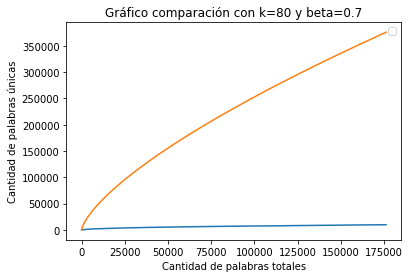

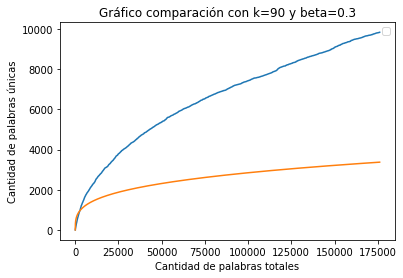

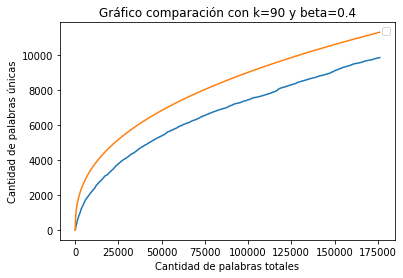

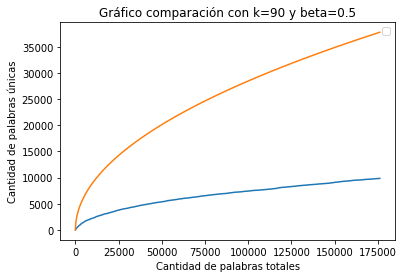

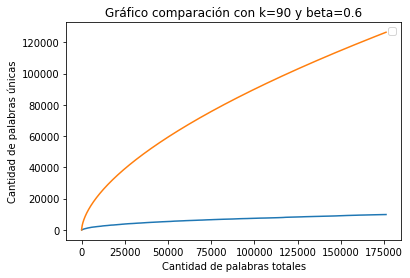

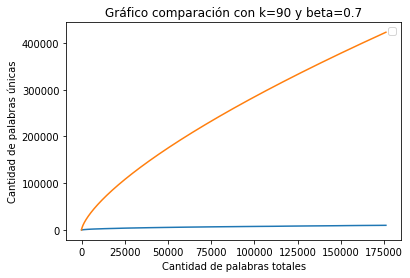

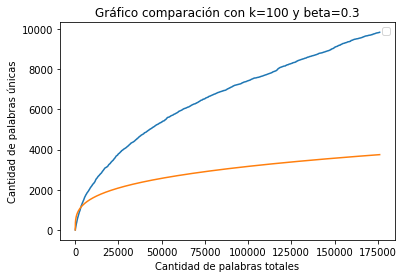

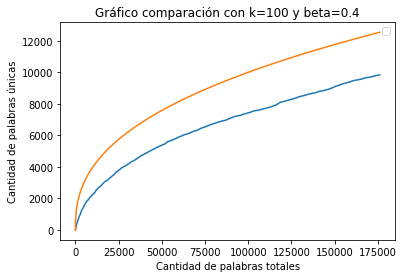

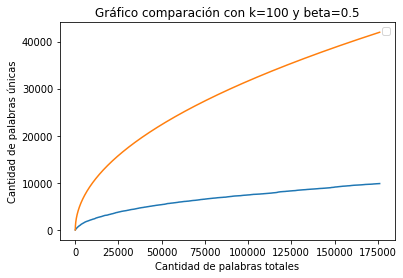

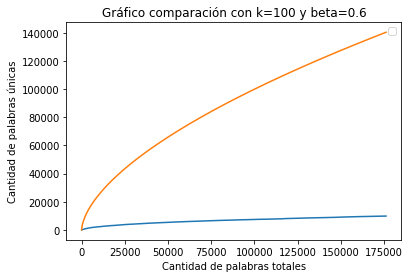

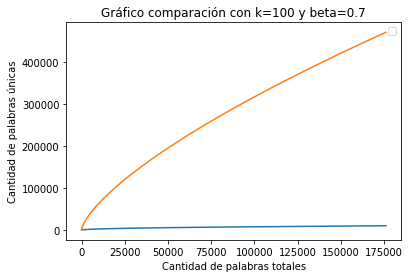

In [50]:
def print_heaps_model(n, beta, k, x, y):
    y_model = []
    for i in range(0,n):
        y_model.append((i**beta)*k)
    plt.title("Gráfico comparación con k="+str(k)+' y beta='+str(beta)) 
    plt.xlabel("Cantidad de palabras totales") 
    plt.ylabel("Cantidad de palabras únicas") 
    plt.legend(('Curva real', 'Curva ajustada'),prop = {'size':10}, loc = 'upper right')
    plt.plot(x, y, x, y_model) 
    plt.show()

# Probar distintos valores de beta y k    
for i in range(1,11): # [10-100]
    for j in range(3,8): #[0.3-0.7]
        print_heaps_model(len(x), j/10, i*10, x, y)
